# Отчет по практическому заданию №1 
## Постановка задачи
Вычислить интеграл $\displaystyle{\int\limits_{-1}^1dx\int\limits_{-1}^1dy\int\limits_{-1}^1dz  ~ \frac{1}{2+x^2+y^2+z^2}}$ с точность 3\% методом Монте-Карло.

# Тройной интеграл, решение с помощью библиотеки scipy

In [4]:
import scipy.integrate

def f(x, y, z): return 1/(2+x**2+y**2+z**2)  # Задаю функцию 

I=scipy.integrate.tplquad(f, -1, 1, lambda x: -1, lambda x: 1, lambda x, y: -1, lambda x, y: 1)  # Интегрирует

print(I)


(2.7464757046266577, 1.776353308652888e-11)


### Получили значение интеграла равное $2.76475704627 \pm 1.7 \cdot 10^{-11}$
# Решение тройного интеграла методом Монте-Карло
Задаю случайные числа

In [28]:
import numpy as np
N=1000

xu=np.random.sample((N))    # Создаю случайные числа от 0 до 1
xr=2*np.random.sample((3,N))-1  # Создаю случайные числа от -1 до 1 для трёх осей: x,y,z

x=np.vstack((xu,xr))       # Объединяю 2 массива

y0 = np.zeros((N))
y1 = np.zeros((N))
y2 = np.zeros((N))
print(x)

[[0.634756   0.9847748  0.35447491 ... 0.66995086 0.4508561  0.15410741]
 [0.26312589 0.40164133 0.94385796 ... 0.03880168 0.4655189  0.62765955]
 [0.37907672 0.04905011 0.90635987 ... 0.72628973 0.25113753 0.42336167]
 [0.91934201 0.06734712 0.41664661 ... 0.42659603 0.58929825 0.2768578 ]]


\begin{equation}
\rho=1  \\
\int\limits_{-1}^1 \int\limits_{-1}^1 \int\limits_{-1}^1  A \cdot dx dy dz = 1 \\
A=1/8 \\
R(x) = A  \int\limits_{-1}^1  \int\limits_{-1}^1 dy dz = 1/2 \\
\gamma_{3i} =  \int\limits_{-1}^{\xi_i} 1/2 ~ dx = 1/2 (\xi_i + 1) \\
R(y) = \frac{A  \int\limits_{-1}^1  dz}{R(\xi_i)} = 1/2 \\
\gamma_{3i+1} =  \int\limits_{-1}^{\eta_i} 1/2 ~ dy = 1/2 (\eta_i + 1) \\
R(z) = \frac{A}{R(\xi_i)R(\xi_i,\eta_i)} = 1/2 \\
\gamma_{3i+2} =  \int\limits_{-1}^{\theta_i} 1/2 ~ dz = 1/2 (\theta_i + 1)
\end{equation}

\begin{equation}
\xi_i = 2 \cdot \gamma_{3i} - 1 \\
\eta_i = 2 \cdot \gamma_{3i+1} - 1 \\
\theta_i = 2 \cdot \gamma_{3i+2} - 1 \\
\end{equation}

In [ ]:
#for i in range(N):
#  y0[i]=2*x[1][i]-1
#  y1[i]=2*x[2][i]-1
#  y2[i]=2*x[3][i]-1
#print(min(y1),max(y1))

In [ ]:
Получается так, что необходимо разыграть случайные величины от -1 до 1

### Сравниваю случайные точки с заданным распределением

In [51]:
p=0 # Кол-во подходящих значений
q=0 
I=0
for i in range(N):
    
    I+=1/N*f(x[1,i],x[2,i],x[3,i])
    
    if x[0,i]<f(x[1,i],x[2,i],x[3,i]):
        p+=1
    else:
        q+=1
        
print('method 1 - ', I*8, '           ', 'method 2 - ', p/(p+q)*8)

method 1 -  2.742444535726737             method 2 -  2.72


Умножение на 8 нужно, так как для четырех-мерного измерения получился рассматриваемый объем случайных чисел $V^4 = 2 \cdot 2\cdot 2\cdot 1$ для x, y, z и f(x,y,z) соответственно

# Оценка дисперсии

In [52]:
sx=0
sx2=0
sy=0
sy2=0
Dx=Dy=0

for i in range(N):
    
    sx+=f(x[1,i],x[2,i],x[3,i])
    sx2+=(f(x[1,i],x[2,i],x[3,i]))**2
    
Dx+=1/(N-1)*(1/N*sx2-(1/N*sx)**2)

print(Dx)

3.4144187396779073e-06


In [53]:
print(3*np.sqrt(Dx)*100, '%')

0.5543443754301216 %


## Наглядное представление кол-ва использованных случайных точек

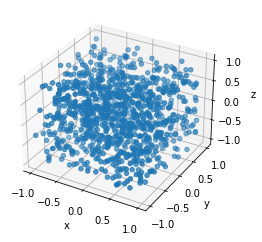

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.scatter(x[1,:],x[2,:],x[3,:])

plt.show()